In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report, 
                            roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Setting random seed
np.random.seed(42)

In [2]:
# !pip install scikit-learn

In [ ]:

data = pd.read_csv('tested.csv')

# basic information
print(f"Dataset shape: {data.shape}")
print("\nFirst 5 rows:")
display(data.head())

print("\nData information:")
data.info()

print("\nDescriptive statistics:")
display(data.describe(include='all'))

print("\nMissing values per column:")
display(data.isnull().sum())

Dataset shape: (418, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB

Descriptive statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Peter, Master. Michael J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN



Missing values per column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

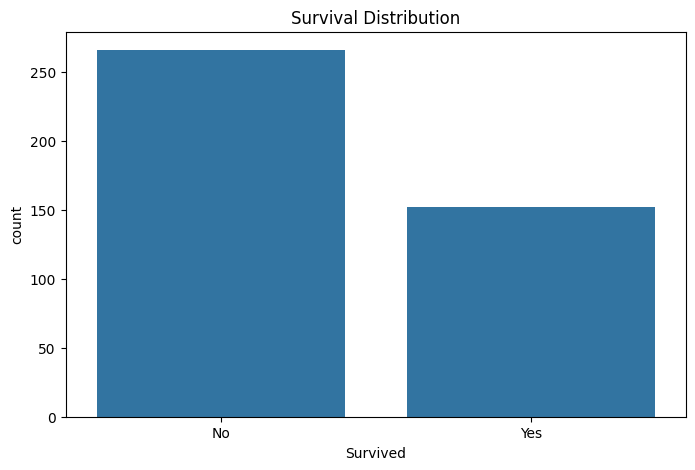

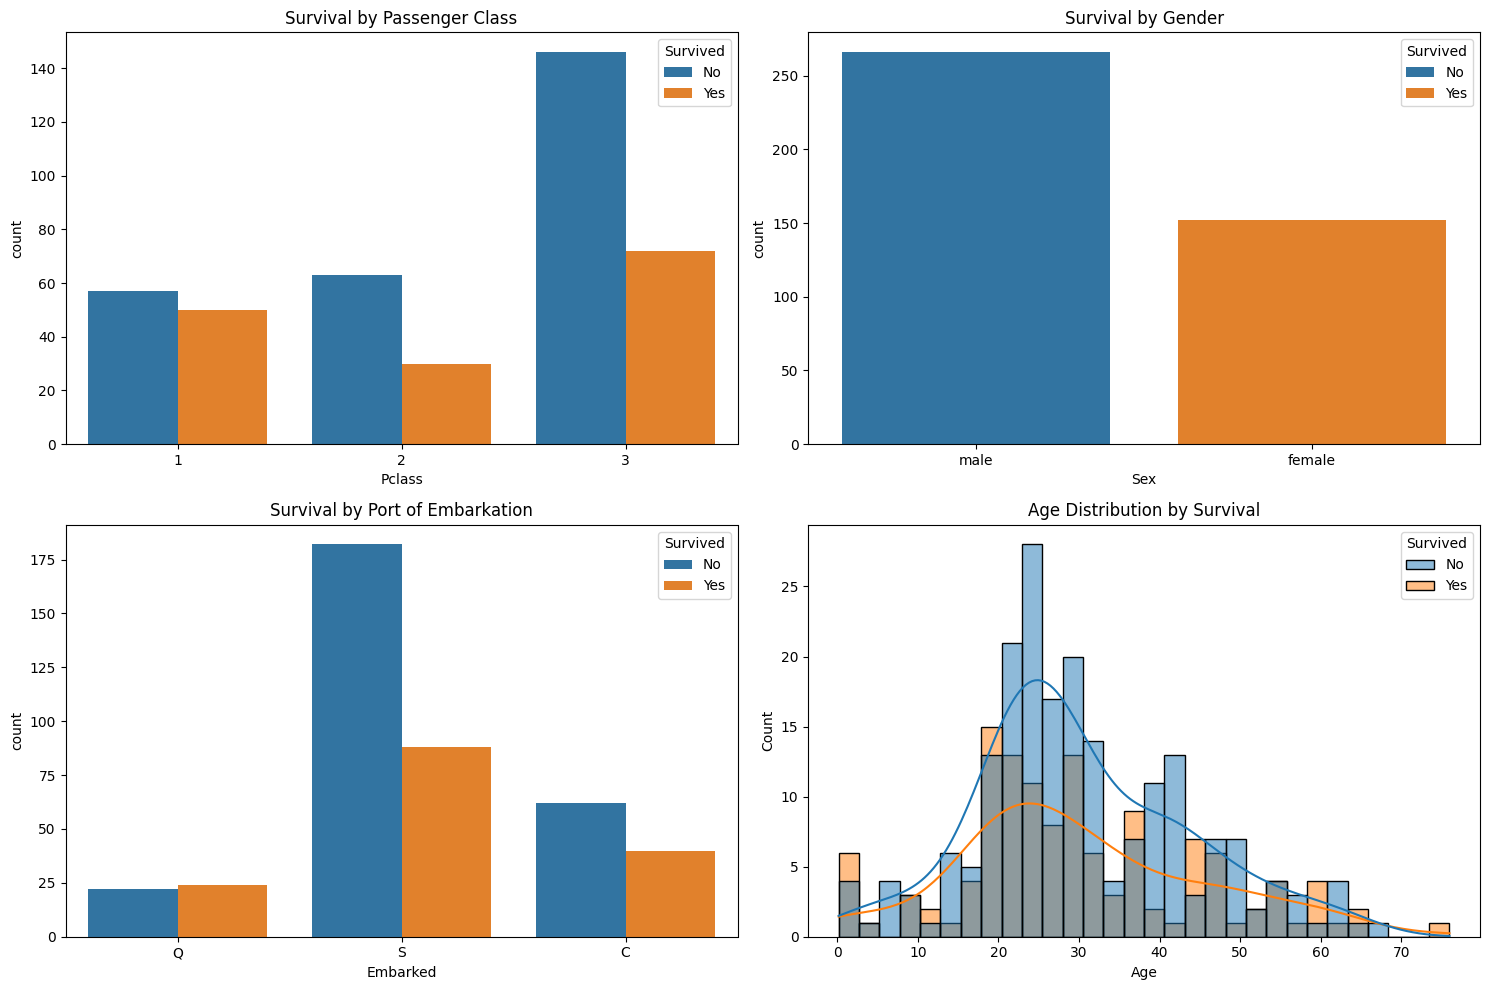

In [ ]:
# Dropping unusefull columns
data_clean = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# Convert Survived to categorical for better visualization
data_clean['Survived'] = data_clean['Survived'].map({0: 'No', 1: 'Yes'})

# Visualize the distribution of survival
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=data_clean)
plt.title('Survival Distribution')
plt.show()

# Visualize survival by different features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=data_clean, ax=axes[0, 0])
axes[0, 0].set_title('Survival by Passenger Class')

# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=data_clean, ax=axes[0, 1])
axes[0, 1].set_title('Survival by Gender')

# Survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=data_clean, ax=axes[1, 0])
axes[1, 0].set_title('Survival by Port of Embarkation')

# Age distribution by survival
sns.histplot(data=data_clean, x='Age', hue='Survived', kde=True, bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution by Survival')

plt.tight_layout()
plt.show()

# Convert Survived back to numerical for modeling
data_clean['Survived'] = data_clean['Survived'].map({'No': 0, 'Yes': 1})

In [ ]:
# new features that might be helpful
data_clean['FamilySize'] = data_clean['SibSp'] + data_clean['Parch'] + 1
data_clean['IsAlone'] = (data_clean['FamilySize'] == 1).astype(int)

# age groups
data_clean['AgeGroup'] = pd.cut(data_clean['Age'], bins=[0, 12, 18, 35, 50, 100], 
                                labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# fare groups
data_clean['FareGroup'] = pd.qcut(data_clean['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Extract deck from cabin (first letter)
data_clean['Deck'] = data_clean['Cabin'].str[0]

# Display new features
print("\nNew features created:")
display(data_clean[['FamilySize', 'IsAlone', 'AgeGroup', 'FareGroup', 'Deck']].head())


New features created:


,FamilySize,IsAlone,AgeGroup,FareGroup,Deck
0,1,1,Young Adult,Low,NaN
1,2,0,Adult,Low,NaN
2,1,1,Senior,Medium,NaN
3,1,1,Young Adult,Medium,NaN
4,3,0,Young Adult,Medium,NaN


In [ ]:
# print(X[:0])

NameError: name 'X' is not defined

In [ ]:
# Analyze missing values
missing_data = data_clean.isnull().sum().sort_values(ascending=False)
missing_percent = (data_clean.isnull().sum() / data_clean.isnull().count()).sort_values(ascending=False)
missing_df = pd.concat([missing_data, missing_percent], axis=1, keys=['Total', 'Percent'])
print("Missing values analysis:")
display(missing_df)

# Strategy for each column:
# Age - Impute with median (could also use predictive imputation)
# Cabin - Too many missing, we'll treat as a category with 'Missing' as a value
# Embarked - Only 2 missing, we'll impute with mode
# Fare - Only 1 missing, we'll impute with median
# Deck - Will be handled with Cabin

# Separate features and target
X = data_clean.drop('Survived', axis=1)
y = data_clean['Survived']

# Split data before imputation to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define numerical and categorical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'IsAlone', 'AgeGroup', 'FareGroup', 'Deck']

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# one-hot encoding
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_one_hot_attribs = list(cat_encoder.get_feature_names_out(categorical_features))
feature_names = numerical_features + cat_one_hot_attribs

# visualization
X_train_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)

print("\nPreprocessed training data shape:", X_train_preprocessed.shape)
print("Preprocessed test data shape:", X_test_preprocessed.shape)

Missing values analysis:


,Total,Percent
Deck,327,0.782297
Cabin,327,0.782297
Age,86,0.205742
AgeGroup,86,0.205742
Fare,1,0.002392
FareGroup,1,0.002392
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Pclass,0,0.000000



Preprocessed training data shape: (334, 31)
Preprocessed test data shape: (84, 31)


Logistic Regression: Mean Accuracy = 1.0000, Std = 0.0000
Random Forest: Mean Accuracy = 1.0000, Std = 0.0000
Gradient Boosting: Mean Accuracy = 1.0000, Std = 0.0000
SVM: Mean Accuracy = 0.9730, Std = 0.0198


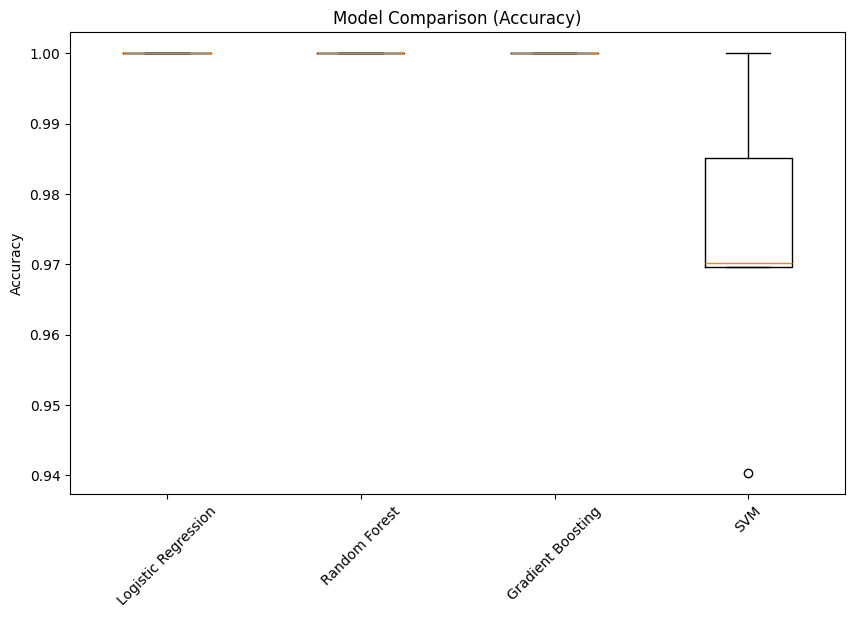


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 1.0000


RandomForestClassifier(random_state=42)

In [ ]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    print(f"{name}: Mean Accuracy = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}")

plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys())
plt.title('Model Comparison (Accuracy)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_preprocessed, y_train)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
best_model.fit(X_train_preprocessed, y_train)


Model Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000


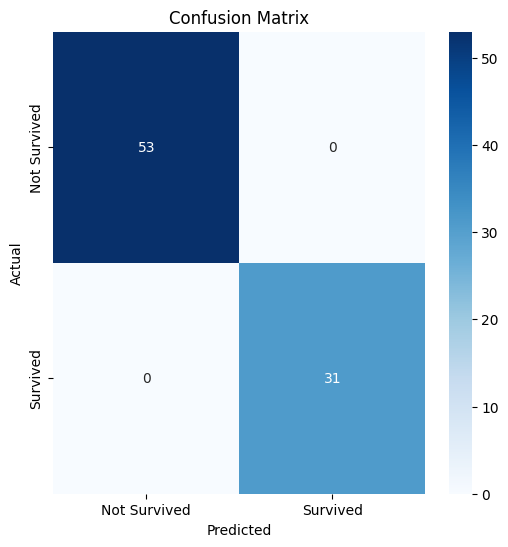


Classification Report:
              precision    recall  f1-score   support

Not Survived       1.00      1.00      1.00        53
    Survived       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



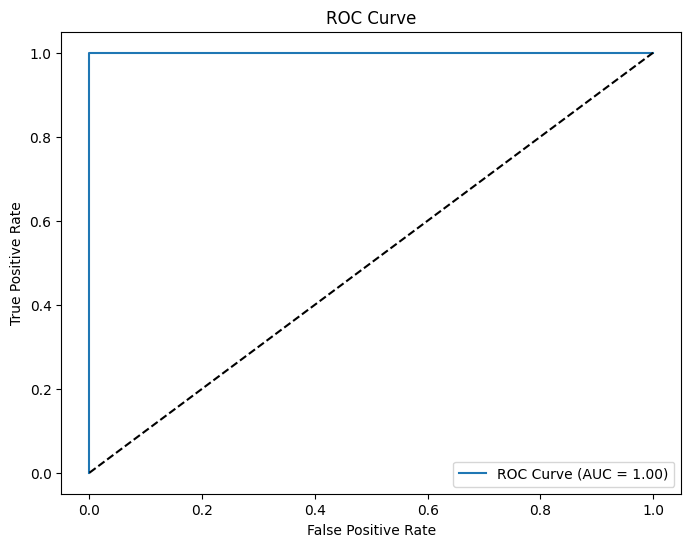

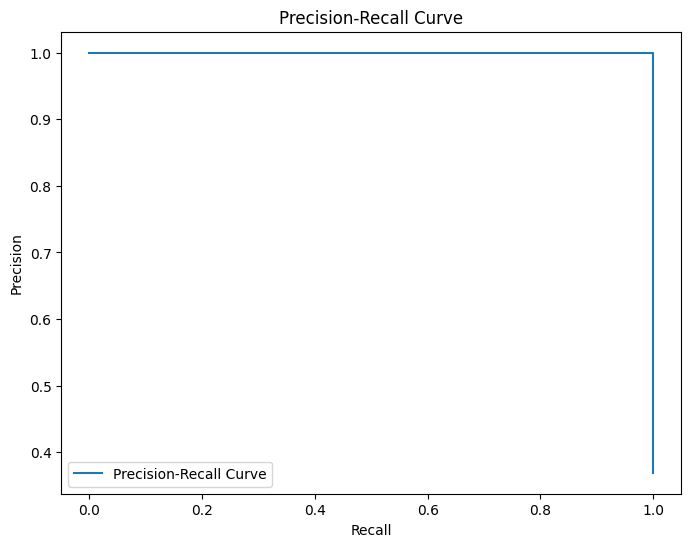

In [ ]:
y_pred = best_model.predict(X_test_preprocessed)
y_pred_proba = best_model.predict_proba(X_test_preprocessed)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

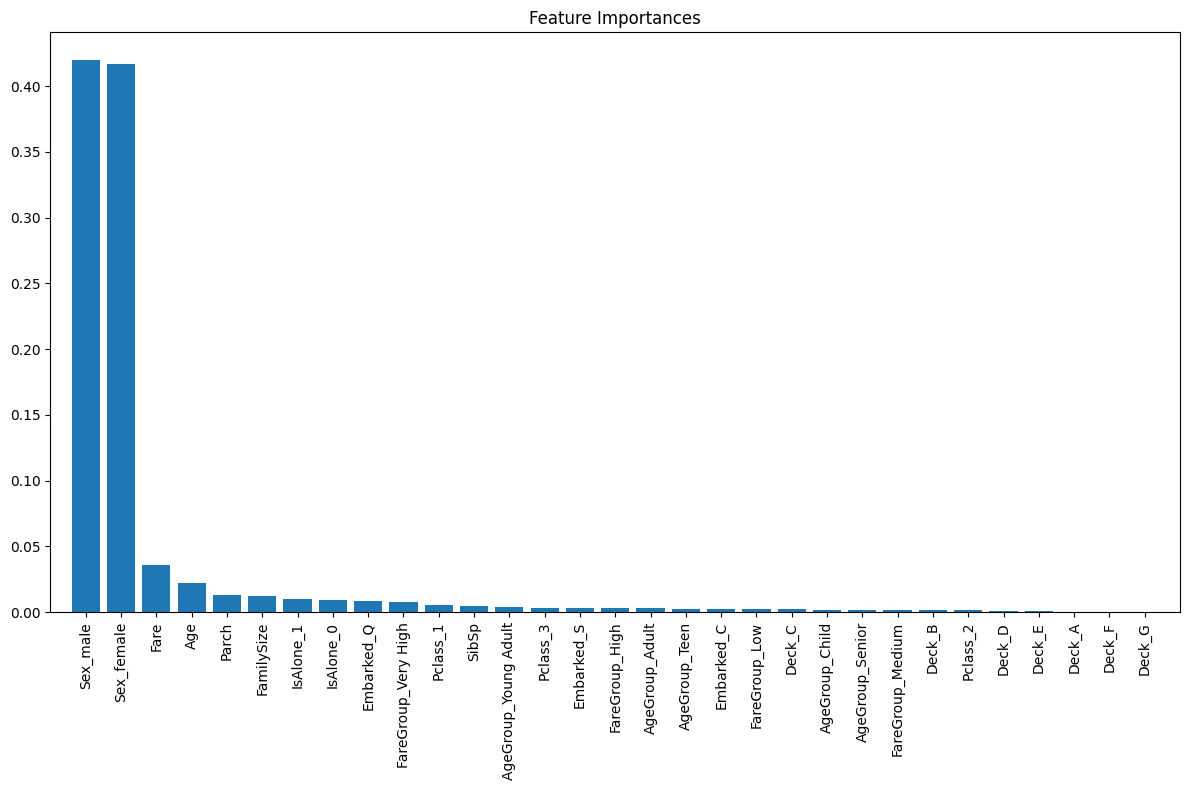


Top 10 Features:
1. Sex_male: 0.4200
2. Sex_female: 0.4167
3. Fare: 0.0358
4. Age: 0.0223
5. Parch: 0.0126
6. FamilySize: 0.0121
7. IsAlone_1: 0.0097
8. IsAlone_0: 0.0092
9. Embarked_Q: 0.0082
10. FareGroup_Very High: 0.0078


In [ ]:
# feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train_preprocessed.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_preprocessed.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train_preprocessed.shape[1]])
plt.tight_layout()
plt.show()

# top 10 features
print("\nTop 10 Features:")
for i in range(10):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")


